In [9]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.signal import argrelmin, argrelmax
import matplotlib.pyplot as plt
import math

In [ ]:
#Function that returns dy/dt
def model(t, y):
    k = .3
    dydt = -k * y
    return dydt

#Initial condition 
y0 = [5]

#Solving
y = solve_ivp(model, [0, 20], y0, max_step=.01)

In [ ]:
y

In [ ]:
#Plot results
plt.plot(y.t, y.y[0])
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

# Example with extra args

In [ ]:
#Function that returns dy/dt
def model(t, y, k):
    dydt = -k * y
    return dydt

#Initial condition 
y0 = [5]

#Solving
sol1 = solve_ivp(model, [0, 20], y0, max_step=.01, args=(.1,)) #args account for k
sol2 = solve_ivp(model, [0, 20], y0, max_step=.01, args=(.2,))
sol3 = solve_ivp(model, [0, 20], y0, max_step=.01, args=(.5,))

In [ ]:
#Plot results
plt.plot(sol1.t, sol1.y[0], 'r-', label='k=0.1')
plt.plot(sol2.t, sol2.y[0], 'b-', label='k=0.2')
plt.plot(sol3.t, sol3.y[0], 'g:', label='k=0.5')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

# Example

Examples pulled from: https://www.youtube.com/watch?v=VV3BnroVjZo

$\frac{dy(t)}{dt} = -y(t) + 1$

$y(0) = 0$


In [ ]:
#Funtion
def mod1(t, y):
    dydt = -y + 1
    return dydt

#Initial Condition
y0 = [0]

sol = solve_ivp(mod1, [0, 5], y0, max_step=.1)

#Plot results
plt.plot(sol.t, sol.y[0])
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

# Example: change in parameter at certain time

$5 \frac{dy(t)}{dt} = -y(t) + u(t)$

$y(0)=1$

$u$ steps from $0$ to $2$ at $t = 10$

In [ ]:
#Funtion
def mod2(t, y):
    
    if t >= 10:
        u = 2
    else:
        u = 0
        
    dydt = (-y + u) / 5
    return dydt

#Initial Condition
y0 = [1]

sol = solve_ivp(mod2, [0, 35], y0, max_step=.1)

#Plot results
plt.plot(sol.t, sol.y[0])
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

# Example: multiple equations

$\frac{dx(t)}{dt} = 3 e^{-t}$

$\frac{dy(t)}{dt} = 3 - y(t)$

$x(0) = 0, \; y(0) = 0$

In [6]:
from math import e

#Funtion
def mod3(t, z):
    x = z[0]
    y = z[1]
    
    dxdt = 3 * e ** (-t)
    dydt = 3 - y
    
    return dxdt, dydt

def event_1(t, z):
    
    x = z[0]
    dxdt = 3 * e ** (-t)
    
    return dxdt

#Initial Condition
z0 = [0, 0]  # x0, y0

sol = solve_ivp(mod3, [0, 10], z0, max_step=.1, events=event_1)

In [8]:
sol.t_events

[array([], dtype=float64)]

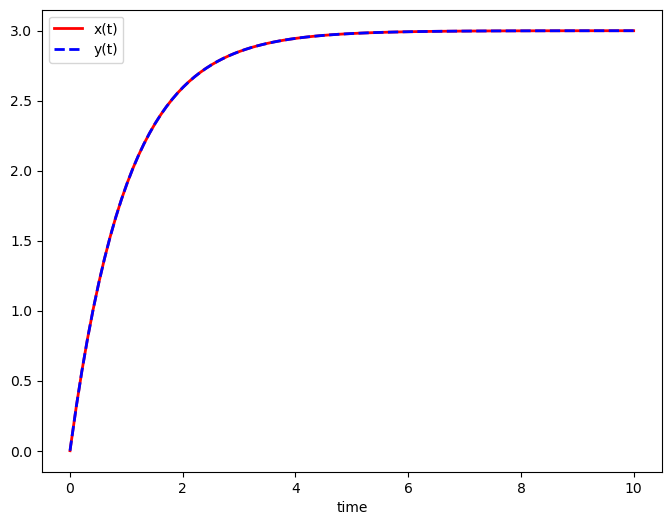

In [3]:
#Plot results
plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0], 'r', linewidth= 2, label='x(t)')
plt.plot(sol.t, sol.y[1], 'b--', linewidth = 2, label='y(t)')
plt.xlabel('time')
plt.legend()
plt.show()

# Example: multiple equations, with step func

In [ ]:
#Funtion
def model(t, z):
    x = z[0]
    y = z[1]
    
    if t>= 5:
        u = 2
    else:
        u = 0
    
    dxdt = (-x + u) / 2
    dydt = (-y + x) / 5
    
    return dxdt, dydt


#Initial Condition
z0 = [0, 0]  # x0, y0

sol = solve_ivp(model, [0, 15], z0, max_step=.1)

#Plot results
plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0], 'r', linewidth= 2, label='x(t)')
plt.plot(sol.t, sol.y[1], 'b--', linewidth = 2, label='y(t)')
plt.xlabel('time')
plt.legend()
plt.show()

# Challenge Problem: HIV Spread

Link to corresponding problem: http://apmonitor.com/pdc/index.php/Main/SimulateHIV

In [3]:
#Funtion
def model(t, z, kr1, kr2, kr3, kr4, kr5, kr6):
    
    H = z[0] #Healthy cells
    I = z[1] #Infected cells
    V = z[2] #Virus Cells
    
    dHdt = kr1 - kr2 * H - kr3 * H * V
    dIdt = kr3 * H * V - kr4 * I
    dVdt = -kr3 * H * V - kr5 * V + kr6 * I
    
    return dHdt, dIdt, dVdt

def event1(t, z, kr1, kr2, kr3, kr4, kr5, kr6):
    H = z[0] #Healthy cells
    I = z[1] #Infected cells
    V = z[2] #Virus Cells
    
    dHdt = kr1 - kr2 * H - kr3 * H * V
    
    return dHdt - H
    
def event2(t, z, kr1, kr2, kr3, kr4, kr5, kr6):
    H = z[0] #Healthy cells
    I = z[1] #Infected cells
    V = z[2] #Virus Cells
    
    dIdt = kr3 * H * V - kr4 * I
    
    return dIdt - I

#Initial Conditions
z0 = [1000000, 0, 100]

#Args
kr1 = 1 * 10 ** 5 #new healthy cells per year
kr2 = 0.1 #death rate of healthy cells
kr3 = 2 * 10 ** -7 #healthy cells converting to infected cells
kr4 = 0.5 #death rate of infected cells
kr5 = 5 #death rate of virus
kr6 = 100 # production of virus by infected cells


#Time in years
t = 100

sol = solve_ivp(model, [0, t], z0, args=(kr1, kr2, kr3, kr4, kr5, kr6), max_step=.1, events=[event1, event2])

In [4]:
print(len(sol.y_events[0]))
print(len(sol.t_events[0]))

0
0


In [26]:
l = len(sol.y[0])
ref = sol.y[0][-1]
ref / 1e8

0.001256281407035173

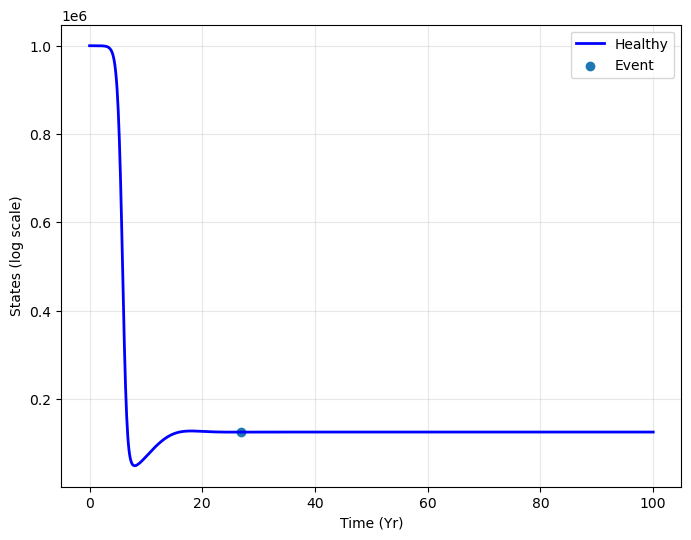

In [31]:
#Plot results
plt.figure(figsize=(8, 6))

for i in range(2, l):

    if not math.isclose(sol.y[0][-i], ref, rel_tol=1e-3):
        index = l - i
        break

else:
    index = 0



plt.plot(sol.t, sol.y[0], 'b', linewidth= 2, label='Healthy')
#plt.plot(sol.t, sol.y[1], 'g:', linewidth = 2, label='Infected')
#plt.plot(sol.t, sol.y[2], 'r--', linewidth = 2, label='Virus Population')
plt.scatter(sol.t[index], sol.y[0][index], label='Event')

plt.xlabel('Time (Yr)')
plt.ylabel('States (log scale)')
plt.legend(); plt.grid(alpha=.3)
plt.show()

In [19]:
len(sol.t)

1005

# Finding local min and max of ODE solutions

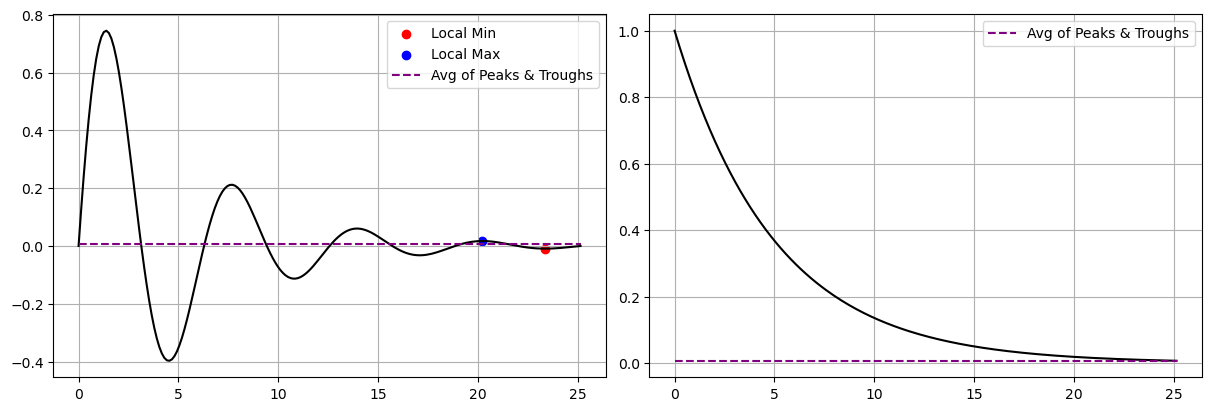

In [2]:
x = np.linspace(0, 8 * np.pi, 200)

y = (np.e ** (-.2 * x)) * np.sin(x)
z = np.e ** (-.2 * x)

#Considering last present local min and max
l_min = argrelmin(y)[0]
l_max = argrelmax(y)[0]

l_min2 = argrelmin(z)[0]
l_max2 = argrelmax(z)[0]

if (len(l_min) == 0) or (len(l_max) == 0):
    avg = y[-1]
    avg = np.full(len(x), avg)
    
else:
    x_min = x[l_min[-1]]
    y_min = y[l_min[-1]]

    x_max = x[l_max[-1]]
    y_max = y[l_max[-1]]

    avg = np.mean((y_min, y_max))
    avg = np.full(len(x), avg)
    
    
if (len(l_min2) == 0) or (len(l_max2) == 0):
    avg = z[-1]
    avg = np.full(len(x), avg)
    
else:
    x_min = x[l_min2[-1]]
    z_min = z[l_min2[-1]]

    x_max = x[l_max2[-1]]
    z_max = z[l_max2[-1]]

    avg = np.mean((z_min, z_max))
    avg = np.full(len(x), avg)

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
    
ax[0].plot(x, y, color = 'black')
ax[0].scatter(x_min, y_min, color = 'red', label = 'Local Min')
ax[0].scatter(x_max, y_max, color = 'blue', label = 'Local Max')
ax[0].plot(x, avg, '--', color = 'purple', label = 'Avg of Peaks & Troughs')

ax[0].legend()
ax[0].grid()

ax[1].plot(x, z, color = 'black')
#ax[1].scatter(x_min, z_min, color = 'red', label = 'Local Min')
#ax[1].scatter(x_max, z_max, color = 'blue', label = 'Local Max')
ax[1].plot(x, avg, '--', color = 'purple', label = 'Avg of Peaks & Troughs')

ax[1].legend()
ax[1].grid()


NA


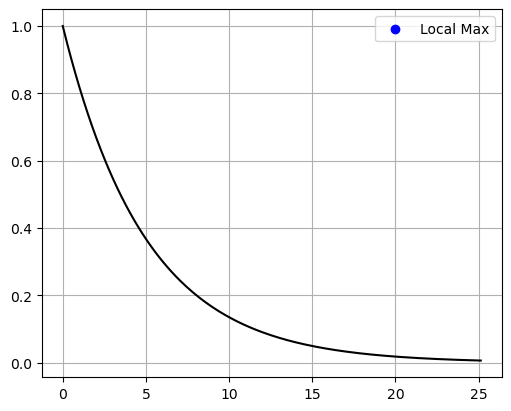

In [12]:
x = np.linspace(0, 8 * np.pi, 200)

y = (np.e ** (-.2 * x)) #* np.sin(x)
#z = np.e ** (-.2 * x)

#Find local max 
l_max = argrelmax(y)[0] #indices
x_max = x[l_max] #actual x values
y_max = y[l_max]

def difference(x_max):
    
    l = len(x_max)
    differences = []
    
    if l > 1:
        for i in range(l - 1):
            differences.append(x_max[i + 1] - x_max[i])
    else:
        differences = "NA"
        
    return differences

print(difference(x_max))

fig, ax = plt.subplots(1, constrained_layout=True, figsize=(5, 4))
    
ax.plot(x, y, color = 'black')
ax.scatter(x_max, y_max, color = 'blue', label = 'Local Max')

ax.legend()
ax.grid()




In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

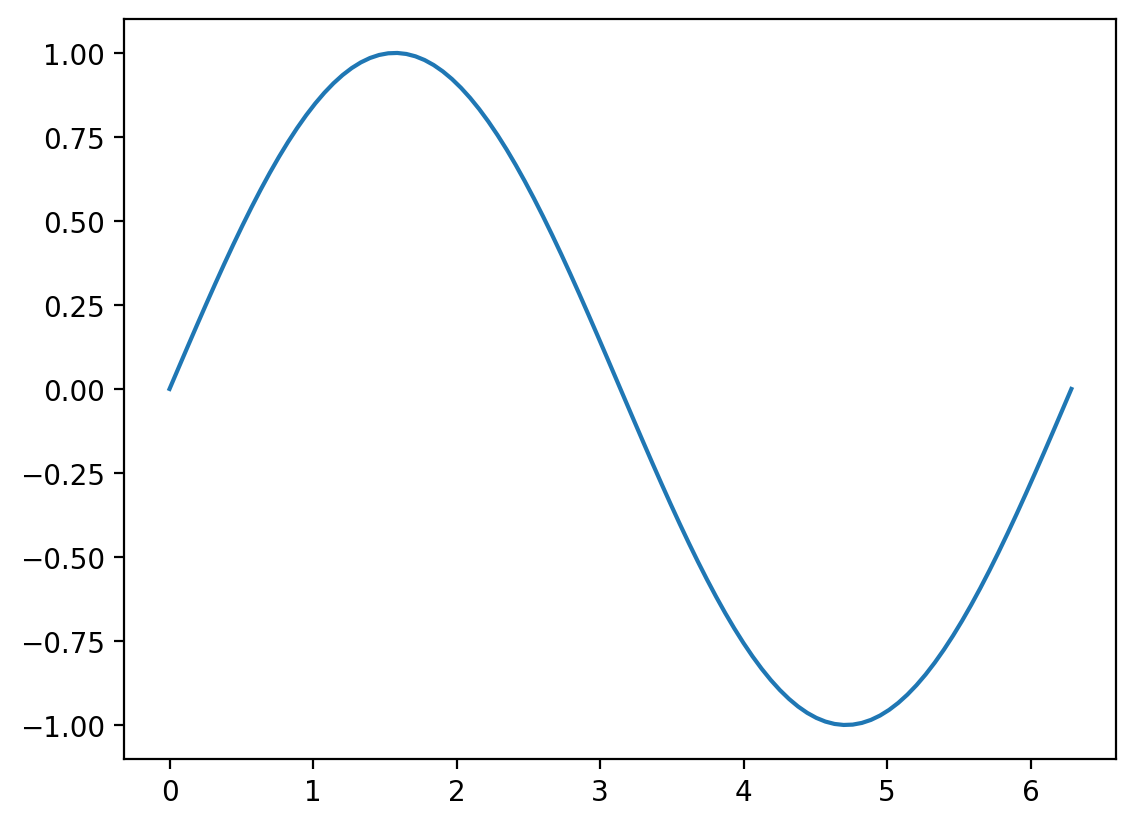

In [2]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

x = np.linspace(0, 2*np.pi)
y = np.cos(x)

fig, ax = plt.subplots()
l, = ax.plot([0, 2*np.pi], [-1,1])

animate = lambda i: l.set_data(x[:i], y[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

plt.show()

In [10]:
l